In [228]:
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [248]:
df = pd.read_csv('Full_count_census_changes.csv',index_col=0)

In [ ]:
## Additional pre-processing steps 

In [249]:
# let's drop tracts that have a population of 0
df = df[df['POP00']!=0]

# lets also drop tracts with less than 500 people, these are mostly parks
df = df[df['POP00']>500]

In [250]:
# check for null values
df.isna().sum()

tractid           0
state_x           0
county_x          0
tract_x           0
POP00             0
NHWHT00           0
NHBLK00           0
NTV00             0
ASIAN00           0
HISP00            0
HAW00             0
INDIA00           0
CHINA00           0
FILIP00           0
JAPAN00           0
KOREA00           0
VIET00            0
MEX00             0
PR00              0
CUBAN00           0
FAMILY00          0
FHH00             0
HU00              0
VAC00             0
OHU00             0
OWN00             0
RENT00            0
A18UND00          0
A60UP00           0
A75UP00           0
AGEWHT00          0
A15WHT00          0
A60WHT00          0
AGEBLK00          0
A15BLK00          0
A60BLK00          0
AGEHSP00          0
A15HSP00          0
A60HSP00          0
AGEASN00          0
A15ASN00          0
A60ASN00          0
AGENTV00          0
A15NTV00          0
A60NTV00          0
pop10             0
nhwht10           0
nhblk10           0
ntv10             0
asian10           0


In [251]:
df.head()

,tractid,state_x,county_x,tract_x,POP00,NHWHT00,NHBLK00,NTV00,ASIAN00,HISP00,HAW00,INDIA00,CHINA00,FILIP00,JAPAN00,KOREA00,VIET00,MEX00,PR00,CUBAN00,FAMILY00,FHH00,HU00,VAC00,OHU00,OWN00,RENT00,A18UND00,A60UP00,A75UP00,AGEWHT00,A15WHT00,A60WHT00,AGEBLK00,A15BLK00,A60BLK00,AGEHSP00,A15HSP00,A60HSP00,AGEASN00,A15ASN00,A60ASN00,AGENTV00,A15NTV00,A60NTV00,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,haw10,india10,china10,filip10,japan10,korea10,viet10,mex10,pr10,cuban10,family10,fhh10,hu10,vac10,ohu10,own10,rent10,a18und10,a60up10,a75up10,agewht10,a15wht10,a60wht10,ageblk10,a15blk10,a60blk10,agehsp10,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,POP00_POC,NHWHT00_POC,NHBLK00_POC,NTV00_POC,ASIAN00_POC,HISP00_POC,HAW00_POC,INDIA00_POC,CHINA00_POC,FILIP00_POC,JAPAN00_POC,KOREA00_POC,VIET00_POC,MEX00_POC,PR00_POC,CUBAN00_POC,FAMILY00_POC,FHH00_POC,HU00_POC,VAC00_POC,OHU00_POC,OWN00_POC,RENT00_POC,A18UND00_POC,A60UP00_POC,A75UP00_POC,AGEWHT00_POC,A15WHT00_POC,A60WHT00_POC,AGEBLK00_POC,A15BLK00_POC,A60BLK00_POC,AGEHSP00_POC,A15HSP00_POC,A60HSP00_POC,AGEASN00_POC,A15ASN00_POC,A60ASN00_POC,AGENTV00_POC,A15NTV00_POC,A60NTV00_POC
0,25025000100,MA,Suffolk County,Census Tract 1,3968.000000,2810.000000,198.000000,22.000000,434.000000,349.000000,0.0,40.000000,245.000000,12.000000,12.000000,15.000000,98.000000,23.000000,39.000000,6.000000,697.000000,62.000000,1614.000000,51.000000,1563.000000,441.000000,1122.000000,545.00000,547.000000,211.000000,2810.000000,231.000000,467.000000,145.000000,30.000000,5.000000,349.000000,84.000000,18.00000,403.000000,92.000000,40.000000,8.000000,2.000000,0.0,4254,2508,288,16,524,621,0,38,284,16,18,38,49,44,91,11,698,100,1707,91,1616,408,1208,579,481,182,2508,179,369,249,57,16,621,144,24,468,55,60,3,0,0,7.207661,-10.747331,45.454545,-27.272727,20.737327,77.936963,NaN,-5.000000,15.918367,33.333333,50.000000,153.333333,-50.000000,91.304348,133.333333,83.333333,0.143472,61.290323,5.762082,78.431373,3.390915,-7.482993,7.664884,6.238532,-12.065814,-13.744076,-10.747331,-22.510823,-20.985011,71.724138,90.000000,220.000000,77.936963,71.428571,33.333333,16.129032,-40.217391,50.000000,-62.500000,-100.000000,NaN
1,25025000201,MA,Suffolk County,Census Tract 2.01,3887.000000,3017.000000,137.000000,11.000000,349.000000,289.000000,0.0,33.000000,223.000000,26.000000,11.000000,14.000000,18.000000,25.000000,34.000000,25.000000,655.000000,45.000000,1574.000000,31.000000,1543.000000,463.000000,1080.000000,450.00000,426.000000,167.000000,3017.000000,222.000000,369.000000,109.000000,28.000000,7.000000,289.000000,70.000000,19.00000,328.000000,52.000000,26.000000,6.000000,0.000000,1.0,3854,2728,275,13,352,407,0,42,198,22,15,22,14,18,52,23,571,71,1618,77,1541,447,1094,439,383,137,2728,151,293,244,64,13,407,121,32,324,44,41,5,1,1,-0.848984,-9.579052,100.729927,18.181818,0.859599,40.830450,NaN,27.272727,-11.210762,-15.384615,36.363636,57.142857,-22.222222,-28.000000,52.941176,-8.000000,-12.824427,57.777778,2.795426,148.387097,-0.129618,-3.455724,1.296296,-2.444444,-10.093897,-17.964072,-9.579052,-31.981982,-20.596206,123.853211,128.571429,85.714286,40.830450,72.857143,68.421053,-1.219512,-15.384615,57.692308,-16.666667,inf,0.0
2,25025000202,MA,Suffolk County,Census Tract 2.02,3925.000000,2523.000000,299.000000,10.000000,606.000000,442.000000,0.0,45.000000,377.000000,4.000000,7.000000,22.000000,107.000000,19.000000,130.000000,15.000000,766.000000,148.000000,1516.000000,22.000000,1494.000000,511.000000,983.000000,747.00000,546.000000,185.000000,2523.000000,248.000000,444.000000,251.000000,95.000000,22.000000,442.000000,165.000000,19.00000,593.000000,136.000000,56.000000,8.000000,5.000000,0.0,3885,2370,289,16,549,596,0,42,346,13,4,18,69,23,122,19,711,149,1522,42,1480,474,1006,656,478,179,2370,200,339,273,74,25,596,197,28,525,82,79,12,4,1,-1.019108,-6.064209,-3.344482,60.000000,-9.405941,34.841629,NaN,-6.666667,-8.222812,225.000000,-42.857143,-18.181818,-35.514019,21.052632,-6.153846,26.666667,-7.180157,0.675676,0.39577

In [252]:
# drop hawaiian pop data given it's often empty
df.drop(columns=['HAW00_POC','HAW00','haw10'],axis=1,inplace=True)

# drop Native American age data given it also is often empty/small proportion of population
df.drop(columns=['A15NTV00_POC','A15NTV00','a15ntv10'],axis=1,inplace=True)
df.drop(columns=['A60NTV00_POC','A60NTV00','a60ntv10'],axis=1,inplace=True)

In [253]:
df.isna().sum()

tractid          0
state_x          0
county_x         0
tract_x          0
POP00            0
NHWHT00          0
NHBLK00          0
NTV00            0
ASIAN00          0
HISP00           0
INDIA00          0
CHINA00          0
FILIP00          0
JAPAN00          0
KOREA00          0
VIET00           0
MEX00            0
PR00             0
CUBAN00          0
FAMILY00         0
FHH00            0
HU00             0
VAC00            0
OHU00            0
OWN00            0
RENT00           0
A18UND00         0
A60UP00          0
A75UP00          0
AGEWHT00         0
A15WHT00         0
A60WHT00         0
AGEBLK00         0
A15BLK00         0
A60BLK00         0
AGEHSP00         0
A15HSP00         0
A60HSP00         0
AGEASN00         0
A15ASN00         0
A60ASN00         0
AGENTV00         0
pop10            0
nhwht10          0
nhblk10          0
ntv10            0
asian10          0
hisp10           0
india10          0
china10          0
filip10          0
japan10          0
korea10     

In [254]:
# let's replace 'NaN' and 'inf' with 0's

# an inf value indicates the denominator was 0, meaning that the 2000 (or initial) value was 0
# a nan value indicates the numerator was 0, meaning that the initial and final values were equal
df.fillna(0,inplace=True)
df.replace([np.inf, -np.inf], 0,inplace=True)

In [256]:
df.shape

(193, 118)

# Full count 

## Statistics

In [ ]:
# Run a stats test:
# Null: Tracts with 
# Alternative: there is no relationship among variables

In [ ]:
# Other stats

In [247]:
df['POP00'].describe()

count     193.000000
mean     3569.956047
std      1459.783501
min       610.720658
25%      2409.000000
50%      3448.000000
75%      4507.000000
max      7984.000000
Name: POP00, dtype: float64

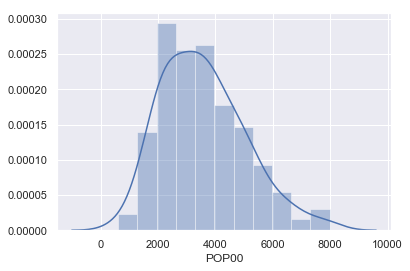

In [236]:
sns.distplot(df['POP00']) 

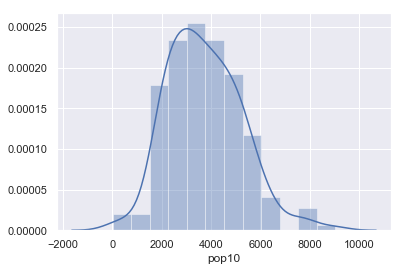

In [238]:
sns.distplot(df['pop10']) 

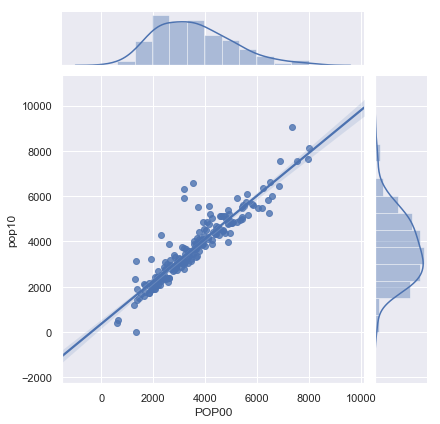

In [239]:
sns.jointplot(x='POP00',y='pop10',data=df,kind='reg')

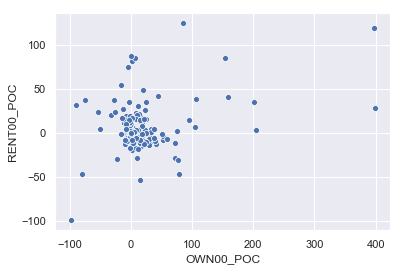

In [241]:
sns.scatterplot(x='OWN00_POC',y='RENT00_POC',data=df)

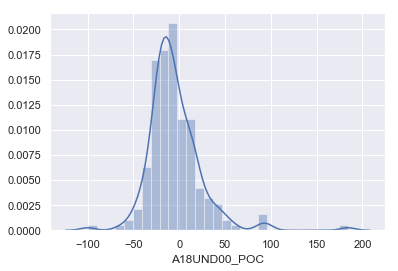

In [244]:
sns.distplot(df['A18UND00_POC'])

## Visuals

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

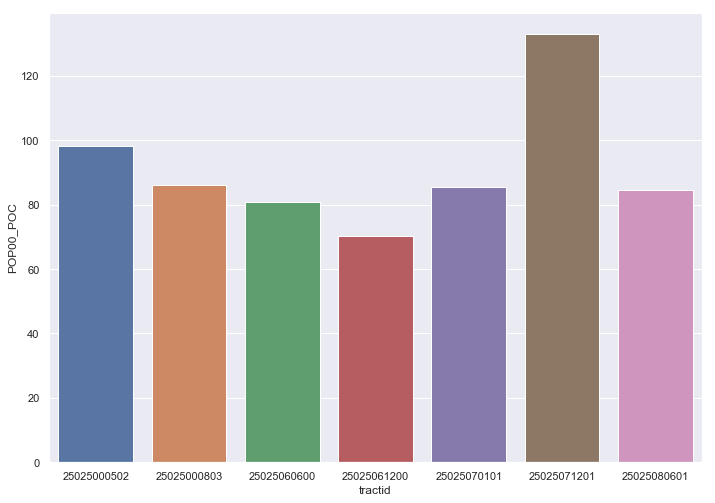

In [155]:
sns.barplot(y='POP00_POC',x='tractid',data=df[df['POP00_POC']>50])

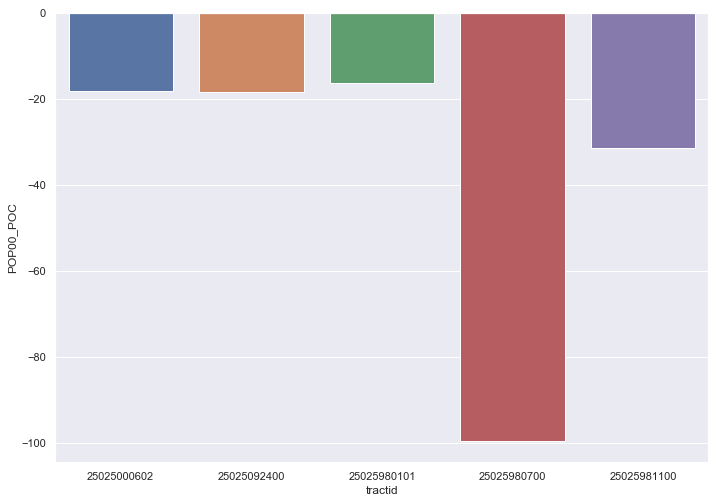

In [158]:
sns.barplot(y='POP00_POC',x='tractid',data=df[df['POP00_POC']<-15])

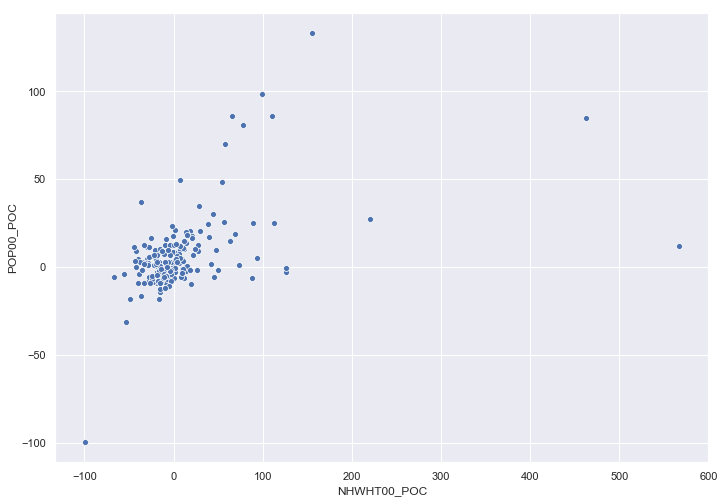

In [159]:
# change in population plotted against change in percentage of people who are white
sns.scatterplot(x='NHWHT00_POC',y='POP00_POC',data=df)

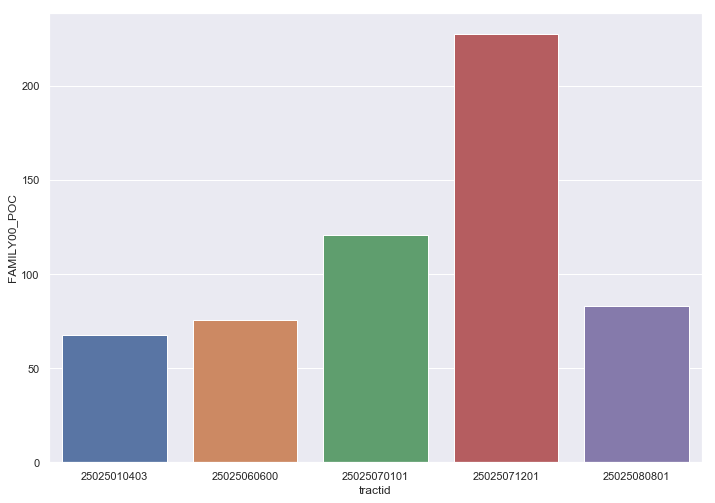

In [161]:
sns.barplot(y='FAMILY00_POC',x='tractid',data=df[df['FAMILY00_POC']>50])

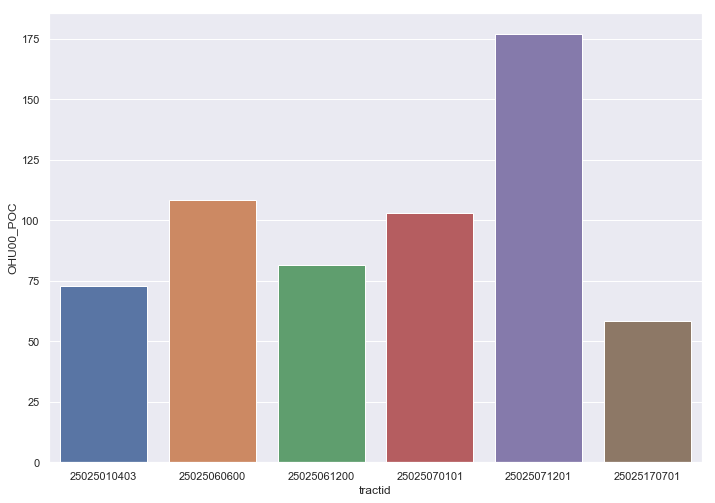

In [162]:
# housing units

sns.barplot(y='OHU00_POC',x='tractid',data=df[df['OHU00_POC']>50])

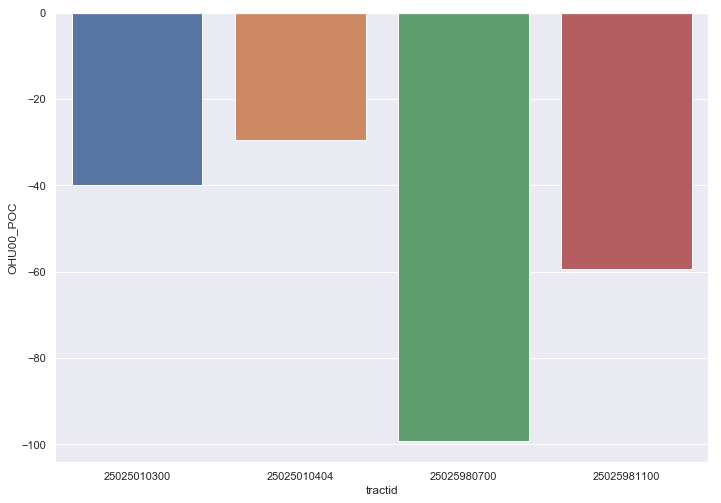

In [164]:
# housing units
sns.barplot(y='OHU00_POC',x='tractid',data=df[df['OHU00_POC']<-20])

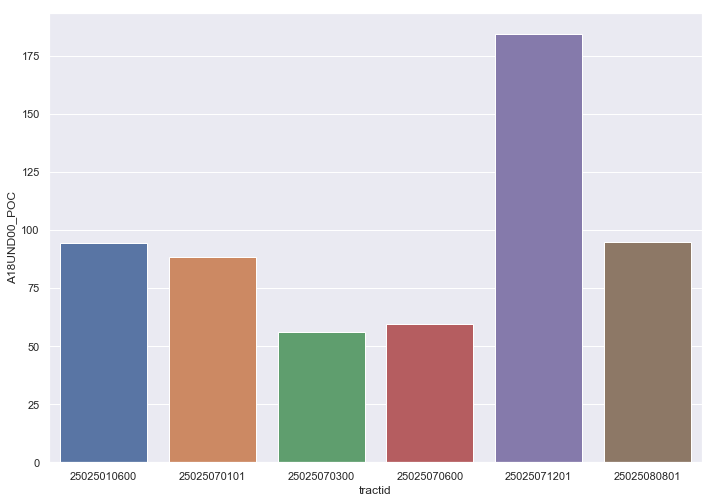

In [165]:
sns.barplot(y='A18UND00_POC',x='tractid',data=df[df['A18UND00_POC']>50])

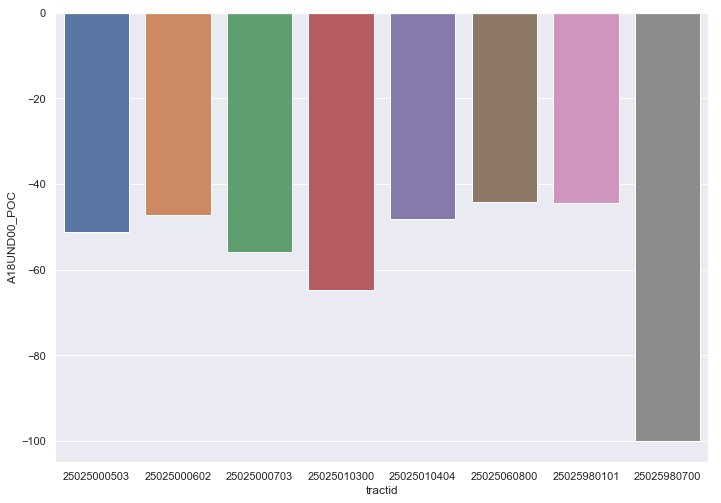

In [168]:
sns.barplot(y='A18UND00_POC',x='tractid',data=df[df['A18UND00_POC']<-40])

# Sample Count

In [220]:
df2 =  pd.read_csv('Sample_count_census_changes.csv',index_col=0)

In [221]:
df2.head()

,tractid,RUANC00,ITANC00,GEANC00,IRANC00,SCANC00,RUFB00,ITFB00,GEFB00,IRFB00,SCFB00,FB00,NAT00,N10IMM00,AG5UP00,OLANG00,LEP00,AG25UP00,HS00,COL00,AG15UP00,Mar-00,WDS00,CLF00,UNEMP00,DFLABF00,FLABF00,EMPCLF00,PROF00,MANUF00,SEMP00,AG18CV00,VET00,DPOV00,NPOV00,N65POV00,DFMPOV00,NFMPOV00,DWPOV00,NWPOV00,DBPOV00,NBPOV00,DNAPOV00,NNAPOV00,DHPOV00,NHPOV00,DAPOV00,NAPOV00,INCPC00,HU00SP,H30OLD00,OHU00SP,H10YRS00,DMULTI00,MULTI00,HINC00,HINCW00,HINCB00,HINCH00,HINCA00,MHMVAL00,MRENT00,HH00,HHW00,HHB00,HHH00,HHA00,ruanc12,itanc12,geanc12,iranc12,scanc12,rufb12,itfb12,gefb12,irfb12,scfb12,fb12,nat12,n10imm12,ag5up12,olang12,lep12,ag25up12,hs12,col12,ag15up12,12-Mar,wds12,clf12,unemp12,dflabf12,flabf12,empclf12,prof12,manuf12,semp12,ag18cv12,vet12,dpov12,npov12,n65pov12,dfmpov12,nfmpov12,dwpov12,nwpov12,dbpov12,nbpov12,dnapov12,nnapov12,dhpov12,nhpov12,dapov12,napov12,incpc12,hu12,h30old12,ohu12,h10yrs12,dmulti12,multi12,hinc12,hincw12,hincb12,hinch12,hinca12,mhmval12,mrent12,hh12,hhw12,hhb12,hhh12,hha12,ITANC00_POC,GEANC00_POC,IRANC00_POC,SCANC00_POC,RUFB00_POC,ITFB00_POC,GEFB00_POC,IRFB00_POC,SCFB00_POC,FB00_POC,NAT00_POC,N10IMM00_POC,AG5UP00_POC,OLANG00_POC,LEP00_POC,AG25UP00_POC,HS00_POC,COL00_POC,AG15UP00_POC,Mar-00_POC,WDS00_POC,CLF00_POC,UNEMP00_POC,DFLABF00_POC,FLABF00_POC,EMPCLF00_POC,PROF00_POC,MANUF00_POC,SEMP00_POC,AG18CV00_POC,VET00_POC,DPOV00_POC,NPOV00_POC,N65POV00_POC,DFMPOV00_POC,NFMPOV00_POC,DWPOV00_POC,NWPOV00_POC,DBPOV00_POC,NBPOV00_POC,DNAPOV00_POC,NNAPOV00_POC,DHPOV00_POC,NHPOV00_POC,DAPOV00_POC,NAPOV00_POC,INCPC00_POC,HU00SP_POC,H30OLD00_POC,OHU00SP_POC,H10YRS00_POC,DMULTI00_POC,MULTI00_POC,HINC00_POC,HINCW00_POC,HINCB00_POC,HINCH00_POC,HINCA00_POC,MHMVAL00_POC,MRENT00_POC,HH00_POC,HHW00_POC,HHB00_POC,HHH00_POC,HHA00_POC,RUANC00_POC
0,25025000100,99.000000,528.000000,94.000000,636.000000,34.000000,24.000000,42.000000,7.0,55.000000,0.0,1033.000000,447.000000,417.00000,3752.000000,1290.000000,306.000000,2752.00000,1206.000000,1128.000000,3478.00000,1135.000000,416.000000,2446.000000,102.000000,1683.000000,1112.000000,2344.00000,982.000000,131.000000,266.00000,3414.000000,257.000000,3929.000000,529.000000,47.000000,700.000000,31.000000,2819.000000,433.000000,143.000000,13.0,31.000000,0.0,327.00000,56.0,423.000000,7.0,21999.00000,1614.000000,1314.000000,1563.000000,1064.000000,1614.000000,1379.000000,44630.00000,44630.00000,45000.0,57833.0000,63500.00000,222100.0000,898.000000,1562.000000,1227.000000,56.000000,108.000000,107.000000,61,384,110,471,108,29,18,0,15,14,1047,552,342,3358,1291,522,2563,1408,789,3258,902,557,2260,137,1587,988,2133,480,167,152,3192,176,3574,524,49,674,23,2415,448,141,9,0,0,629,13,353,52,27564,1681,1589,1510,1161,1681,1322,53571,54777,31759,46106,62115.0,348200,1348,1510,1184,38,143,136,-27.272727,17.021277,-25.943396,217.647059,20.833333,-57.142857,-100.000000,-72.727273,inf,1.355276,23.489933,-17.985612,-10.501066,0.077519,70.588235,-6.867733,16.749585,-30.053191,-6.325474,-20.528634,33.894231,-7.604252,34.313725,-5.704100,-11.151079,-9.001706,-51.120163,27.480916,-42.857143,-6.502636,-31.517510,-9.035378,-0.945180,4.255319,-3.714286,-25.806452,-14.331323,3.464203,-1.398601,-30.769231,-100.0,NaN,92.354740,-76.785714,-16.548463,642.857143,25.296604,4.151177,20.928463,-3.390915,9.116541,4.151177,-4.133430,20.033610,22.735828,-29.424444,-20.277350,-2.181102,56.776227,50.111359,-3.329065,-3.504482,-32.142857,32.407407,33.644860,-38.383838
1,25025000201,82.000000,272.000000,83.000000,967.000000,40.000000,12.000000,21.000000,14.0,219.000000,7.0,1001.000000,457.000000,446.00000,3774.000000,1007.000000,209.000000,2771.00000,808.000000,1312.000000,3526.00000,1055.000000,290.000000,2805.000000,54.000000,1747.000000,1342.000000,2751.00000,1351.000000,223.000000,173.00000,3455.000000,181.000000,3875.000000,337.000000,19.000000,680.000000,19.000000,2944.000000,210.000000,140.000000,43.0,0.000000,0.0,286.00000,40.0,304.000000,9.0,27675.00000,1574.000000,1458.000000,1543.000000,1128.000000,1574.000000,1272.0

In [222]:
tracts_to_remove = [25025981201,25025980300,25025981000,25025981202,25025981300,25025981501,25025981502,
                    25025981600,25025981700,25025981800]

In [223]:
# let's drop same tracts that we dropped from full count df
df2 = df2[df2['tractid'].isin(tracts_to_remove) == False]

In [226]:
df2.isna().sum()

tractid         0
RUANC00         0
ITANC00         0
GEANC00         0
IRANC00         0
SCANC00         0
RUFB00          0
ITFB00          0
GEFB00          0
IRFB00          0
SCFB00          0
FB00            0
NAT00           0
N10IMM00        0
AG5UP00         0
OLANG00         0
LEP00           0
AG25UP00        0
HS00            0
COL00           0
AG15UP00        0
Mar-00          0
WDS00           0
CLF00           0
UNEMP00         0
DFLABF00        0
FLABF00         0
EMPCLF00        0
PROF00          0
MANUF00         0
SEMP00          0
AG18CV00        0
VET00           0
DPOV00          0
NPOV00          0
N65POV00        0
DFMPOV00        0
NFMPOV00        0
DWPOV00         0
NWPOV00         0
DBPOV00         0
NBPOV00         0
DNAPOV00        0
NNAPOV00        0
DHPOV00         0
NHPOV00         0
DAPOV00         0
NAPOV00         0
INCPC00         0
HU00SP          0
H30OLD00        0
OHU00SP         0
H10YRS00        0
DMULTI00        0
MULTI00         0
HINC00    

In [225]:
df2.fillna(0,inplace=True)
df2.replace([np.inf,-np.inf],0,inplace=True)

## Statistics

## Visuals

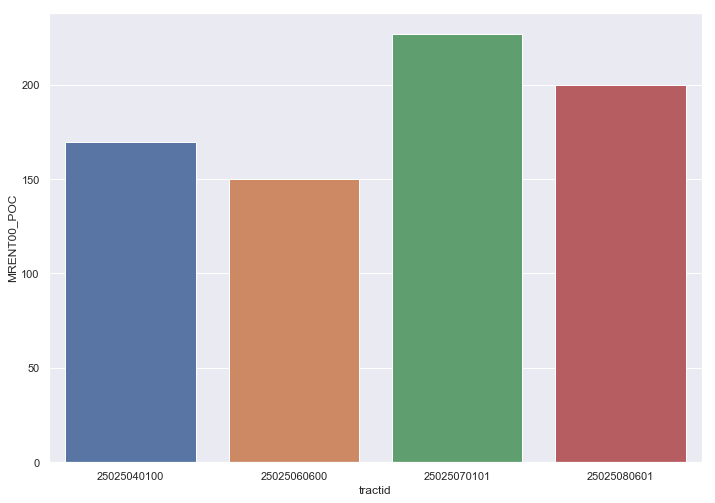

In [184]:
# median rent value
sns.barplot(y='MRENT00_POC',x='tractid',data=df2[df2['MRENT00_POC']>150])

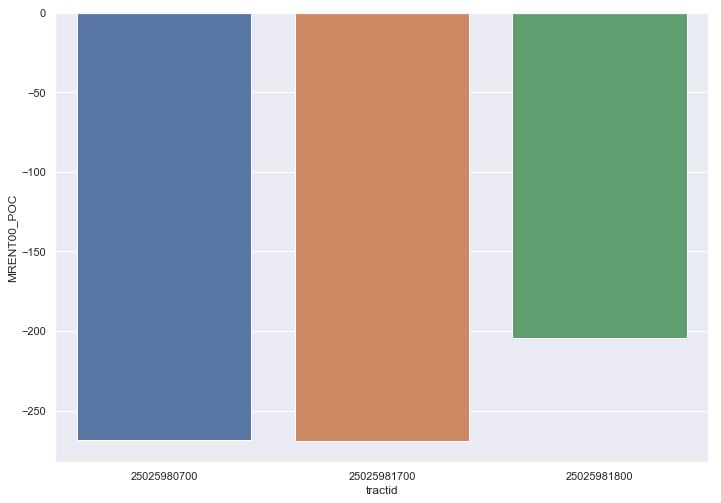

In [185]:
sns.barplot(y='MRENT00_POC',x='tractid',data=df2[df2['MRENT00_POC']<-150])

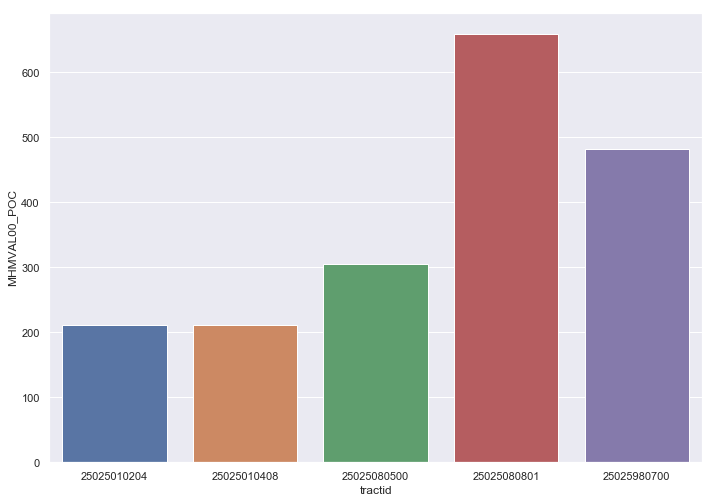

In [186]:
# median house value
sns.barplot(y='MHMVAL00_POC',x='tractid',data=df2[df2['MHMVAL00_POC']>200])

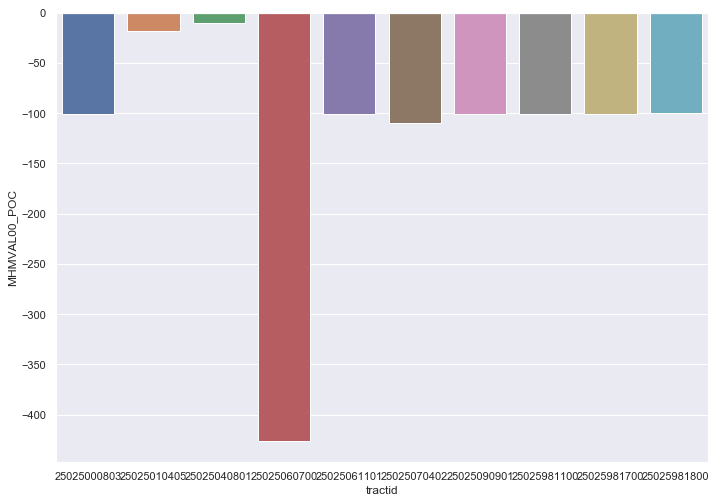

In [187]:
sns.barplot(y='MHMVAL00_POC',x='tractid',data=df2[df2['MHMVAL00_POC']<-5])

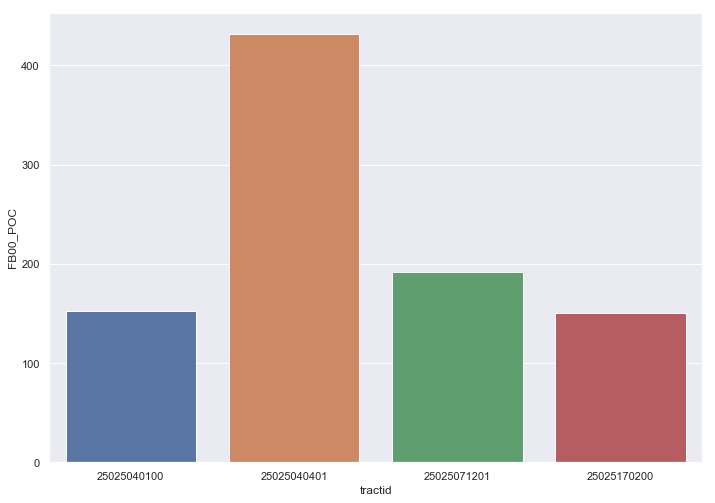

In [188]:
sns.barplot(y='FB00_POC',x='tractid',data=df2[df2['FB00_POC']>150])

In [ ]:
## save final dfs for clustering

In [227]:
df.to_csv('fullcount_csv')
df2.to_csv('sample_csv')